In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [3]:
data = pd.read_csv('../data/house_prices.csv')

In [4]:
print(data)

         Index                                              Title  \
0            0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1            1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2            2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            3        1 BHK Ready to Occupy Flat for sale Kasheli   
4            4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...        ...                                                ...   
187526  187526  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187527  187527  3 BHK Ready to Occupy Flat for sale in Sushma ...   
187528  187528  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187529  187529  2 BHK Ready to Occupy Flat for sale in Friends...   
187530  187530  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                              Description Amount(in rupees)  \
0       Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1       One c

In [5]:
print(data.describe)

<bound method NDFrame.describe of          Index                                              Title  \
0            0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1            1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2            2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            3        1 BHK Ready to Occupy Flat for sale Kasheli   
4            4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...        ...                                                ...   
187526  187526  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187527  187527  3 BHK Ready to Occupy Flat for sale in Sushma ...   
187528  187528  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187529  187529  2 BHK Ready to Occupy Flat for sale in Friends...   
187530  187530  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                              Description Amount(in rupees)  \
0       Bhiwandi, Thane has an attractive 1 BHK Flat f... 

In [6]:
print(data.isnull().sum())

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64


In [7]:
print(data.info)

<bound method DataFrame.info of          Index                                              Title  \
0            0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1            1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2            2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            3        1 BHK Ready to Occupy Flat for sale Kasheli   
4            4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...        ...                                                ...   
187526  187526  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187527  187527  3 BHK Ready to Occupy Flat for sale in Sushma ...   
187528  187528  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187529  187529  2 BHK Ready to Occupy Flat for sale in Friends...   
187530  187530  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                              Description Amount(in rupees)  \
0       Bhiwandi, Thane has an attractive 1 BHK Flat f...   

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

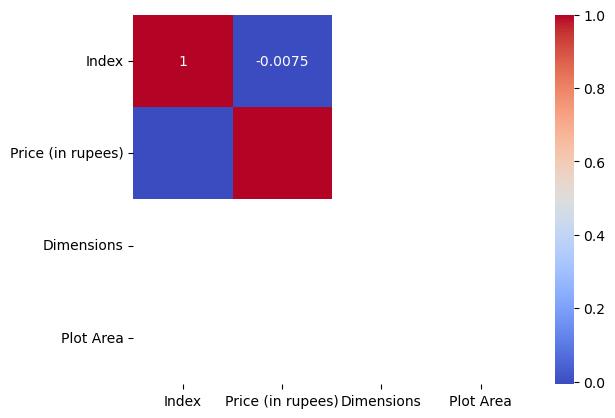

In [8]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

In [9]:
def convert_amount(val):
  if pd.isna(val):
    return None
  val = val.strip().replace("Cr", "").replace("Lac", "").strip()
  if "Cr" in val:
    return float(val) * 10000000
  elif "Lac" in val:
    return float(val) * 100000
  else:
    try:
      return float(val.replace(",", ""))
    except:
      return None

data['Amount_num'] = data['Amount(in rupees)'].str.replace('Cr', '').str.replace('Lac', '')
data['Amount_num'] = data['Amount_num'].str.strip().astype('str').str.replace('Lac', '')
data['Amount_num'] = pd.to_numeric(data['Amount_num'], errors='coerce')


In [10]:
data['Carpet Area'] = data['Carpet Area'].str.extract(r'(\d+)').astype(float)

In [11]:
data['Floor'] = data['Floor'].str.extract(r'(\d+)').astype(float)

In [12]:
data['Bathroom'] = pd.to_numeric(data['Bathroom'], errors='coerce')
data['Balcony'] = pd.to_numeric(data['Balcony'], errors='coerce')

In [13]:
features = [
  'Amount_num',
  'Carpet Area',
  'Floor',
  'Bathroom',
  'Balcony'
]

X = data[features]
y = data['Price (in rupees)']

df_clean = pd.concat([X, y], axis=1).dropna(subset=['Price (in rupees)'])
X = df_clean[features]
y = df_clean['Price (in rupees)']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42
)

pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='median')),
  ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MSE : ", rmse)
print("R2 Score : ", r2)

MSE :  44529.661122726095
R2 Score :  -0.002090447812459928


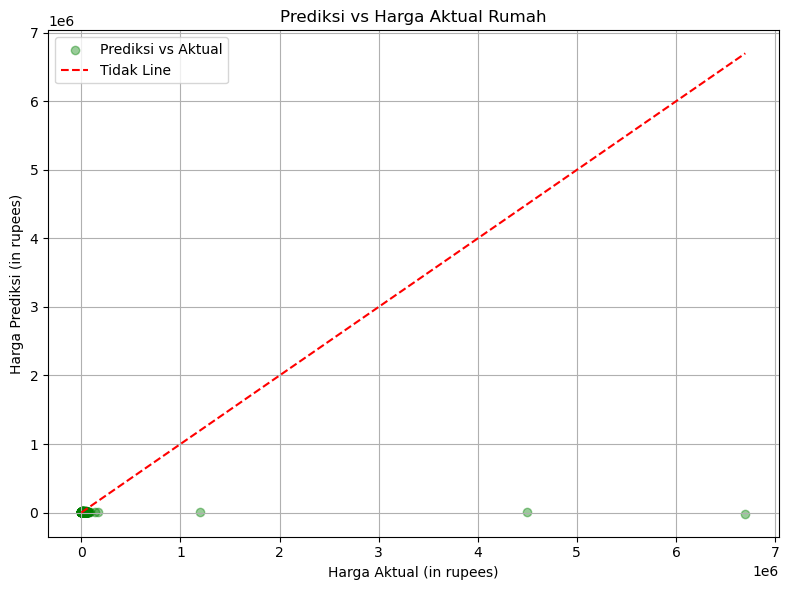

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='green', label='Prediksi vs Aktual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Tidak Line')
plt.xlabel('Harga Aktual (in rupees)')
plt.ylabel('Harga Prediksi (in rupees)')
plt.title('Prediksi vs Harga Aktual Rumah')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
model = pipeline.named_steps['model']
coefs = pd.Series(model.coef_, index=features).sort_values(ascending=False)

print("Koefisien Error")
print(coefs)

Koefisien Error
Bathroom       1376.303700
Balcony         309.276850
Floor           102.357891
Carpet Area       0.030644
Amount_num      -19.018719
dtype: float64


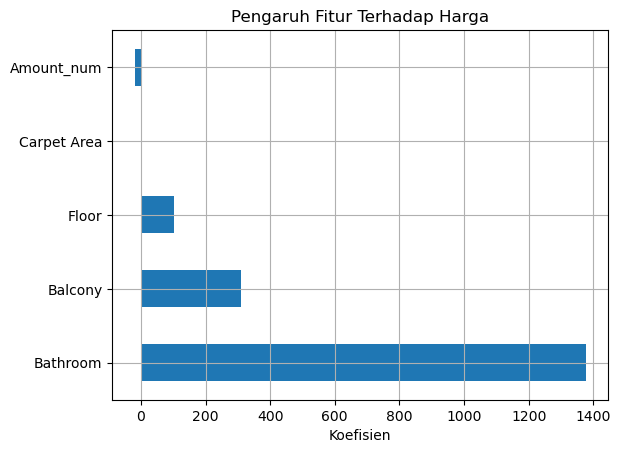

In [18]:
coefs.plot(kind='barh', title='Pengaruh Fitur Terhadap Harga')
plt.xlabel("Koefisien")
plt.grid(True)
plt.show()
